In [ ]:
API_URL = "https://housing-api-brh2.onrender.com/predict"



sample_data = {
    "longitude": -122.23,
    "latitude": 37.88,
    "housing_median_age": 41,
    "total_rooms": 880,
    "total_bedrooms": 129,
    "population": 322,
    "households": 126,
    "median_income": 8.3252,
    "rooms_per_household": 6.98,
    "bedrooms_per_room": 0.15,
    "population_per_household": 2.56,
    "ocean_proximity": "NEAR BAY"
}


import requests
import time
import numpy as np


latencies = []
errors = 0
n_requests = 20

for i in range(n_requests):
    start = time.time()
    try:
        res = requests.post(API_URL, json = sample_data)
        if res.status_code != 200:
            errors += 1
    except:
        errors += 1

    latency = time.time() - start
    latencies.append(latency)

    print(f"Request {i+1}/{n_requests} -> {latency:.4f} sec (Status {res.status_code})")
        



Request 1/20 -> 33.9897 sec (Status 200)
Request 2/20 -> 2.2006 sec (Status 200)
Request 3/20 -> 1.8900 sec (Status 200)
Request 4/20 -> 1.8844 sec (Status 200)
Request 5/20 -> 2.3004 sec (Status 200)
Request 6/20 -> 1.9880 sec (Status 200)
Request 7/20 -> 1.8655 sec (Status 200)
Request 8/20 -> 1.7598 sec (Status 200)
Request 9/20 -> 1.7894 sec (Status 200)
Request 10/20 -> 1.6963 sec (Status 200)
Request 11/20 -> 1.8113 sec (Status 200)
Request 12/20 -> 1.6798 sec (Status 200)
Request 13/20 -> 1.7876 sec (Status 200)
Request 14/20 -> 1.8036 sec (Status 200)
Request 15/20 -> 1.6852 sec (Status 200)
Request 16/20 -> 1.6257 sec (Status 200)
Request 17/20 -> 1.7266 sec (Status 200)
Request 18/20 -> 1.8150 sec (Status 200)
Request 19/20 -> 1.7605 sec (Status 200)
Request 20/20 -> 1.7158 sec (Status 200)


In [2]:
print("----- Load Test Results -------")
print(f"Total Request: {n_requests}")
print(f"Errors: {errors}")
print(f"Avg Latency: {np.mean(latencies):.4f} sec")
print(f"Max. Latency: {np.max(latencies):.4f} sec")
print(f"Min. Latency: {np.min(latencies):.4f} sec")



----- Load Test Results -------
Total Request: 20
Errors: 0
Avg Latency: 19.0948 sec
Max. Latency: 348.6188 sec
Min. Latency: 1.4294 sec


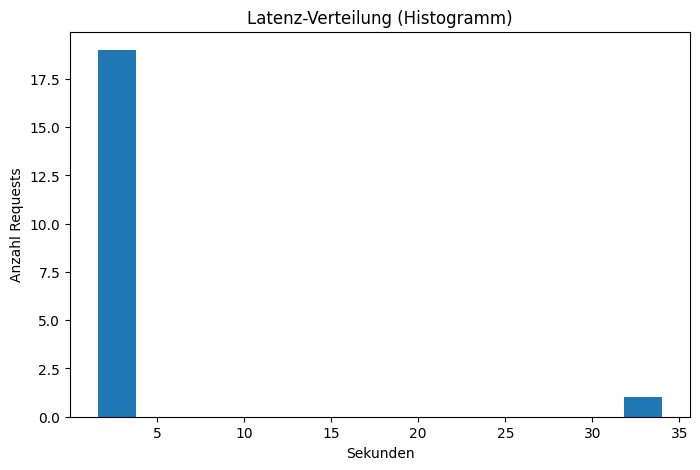

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize =(8,5))
plt.hist(latencies, bins=15)
plt.title("Latenz-Verteilung (Histogramm)")
plt.xlabel("Sekunden")
plt.ylabel("Anzahl Requests")
plt.show()

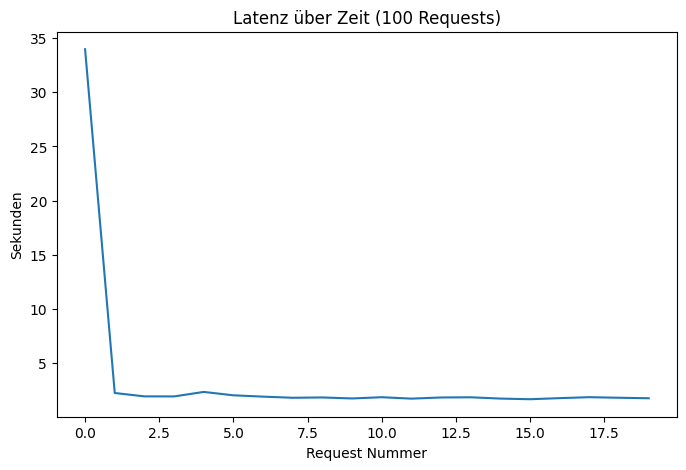

In [6]:
plt.figure(figsize=(8,5))
plt.plot(latencies)
plt.title("Latenz über Zeit (100 Requests)")
plt.xlabel("Request Nummer")
plt.ylabel("Sekunden")
plt.show()

